## NAIVE BAYES CLASSIFIER

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import scipy.stats as st
from copy import deepcopy
import random
import pandas as pd

Q1:

 I decided to have 90% train data and 10% test data, train data must be significantly more than test data, because we must have a good sight to calculate every pixel probibility and we need to generalize it.

In [3]:
train_data_ratio = 0.9
INTERPOLATION_METHOD = cv2.INTER_AREA
SCALE_SIZE = (20,20)

In [4]:
def gaussian_preprocess(smoothing = 0):
    
    train_data = deepcopy(data[:TRAIN_SIZE])
    train_data = np.append(train_data, train_labels[:, None], axis=1)

    for i in range(10):
        class_data = train_data[train_data[:,400]==i][:,:400]
        mean_class[i] = np.mean(class_data,axis=0)
        std_class[i] = np.std(class_data,axis=0)
        std_class[i] = std_class[i] + smoothing
        prob_class[i] = len(class_data)/TRAIN_SIZE

def bernouli_preprocess(threshold = 0.5, alpha = 0):
    bernouli_data = deepcopy(data[:TRAIN_SIZE])

    bernouli_data[bernouli_data >= threshold] = 1
    bernouli_data[bernouli_data < threshold] = 0
    bernouli_data = np.append(bernouli_data, train_labels[:, None], axis=1)

    for i in range(10):
        class_data = bernouli_data[bernouli_data[:,400]==i][:,:400]
        prob_class[i] = len(class_data)/TRAIN_SIZE
        bernouli_pxc[i] = (np.sum(class_data,axis=0) + alpha)/(len(class_data) + 2 * alpha)

In [5]:
def gaussian_naive(new_pic):
    pxc = [0] * 10
    probs = [0] * 10
    px = 0

    for i in range(10):
        pxc[i] = np.prod(st.norm(mean_class[i], std_class[i]).pdf(new_pic))
        px += pxc[i] * prob_class[i]

    for i in range(10):
        probs[i] = pxc[i] * prob_class[i] / px
    
    return probs.index(max(probs))

def bernouli_naive(new_pic):
    pxc = [0] * 10
    probs = [0] * 10
    px = 0

    for i in range(10):
        pxc[i] = np.prod((bernouli_pxc[i]**new_pic) * (1-bernouli_pxc[i]) ** (1-new_pic))
        px += pxc[i] * prob_class[i]

    for i in range(10):
        probs[i] = pxc[i] * prob_class[i] / px
    
    return probs.index(max(probs))

In [6]:
# labels
label_file = open('label.pkl', 'rb')
labels = np.array(pickle.load(label_file))

DATA_SIZE = len(labels)
TRAIN_SIZE = int(train_data_ratio * DATA_SIZE)

train_labels = labels[:TRAIN_SIZE]


#picture datas
data_file = open('data.pkl', 'rb')
data = pickle.load(data_file)
primitive_data = deepcopy(data)



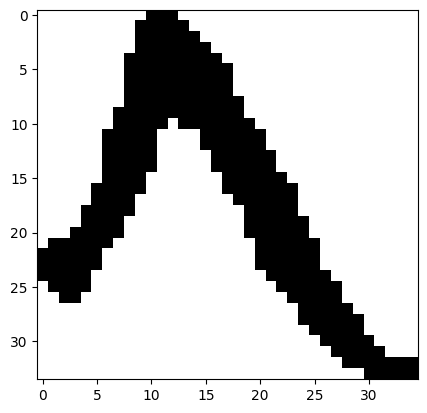

x = 35 and y = 34


In [7]:
random_data = random.randint(0,TRAIN_SIZE - 1)
plt.imshow(primitive_data[random_data],cmap='gray_r')
plt.show()
print('x =', len(primitive_data[random_data][0]),'and y =', len(primitive_data[random_data]))

In [8]:
for i in range(len(data)):
    data[i] = cv2.resize(data[i], dsize=SCALE_SIZE, interpolation = INTERPOLATION_METHOD)
    data[i] = data[i].flatten()
data = np.array(data)
data = data / 255

Q6: 

As we need to use bernouli naive bayse and in some cases we need to have mean of some pixels as their probibility, we should normalize pixels by dividing them to their max value which is 255

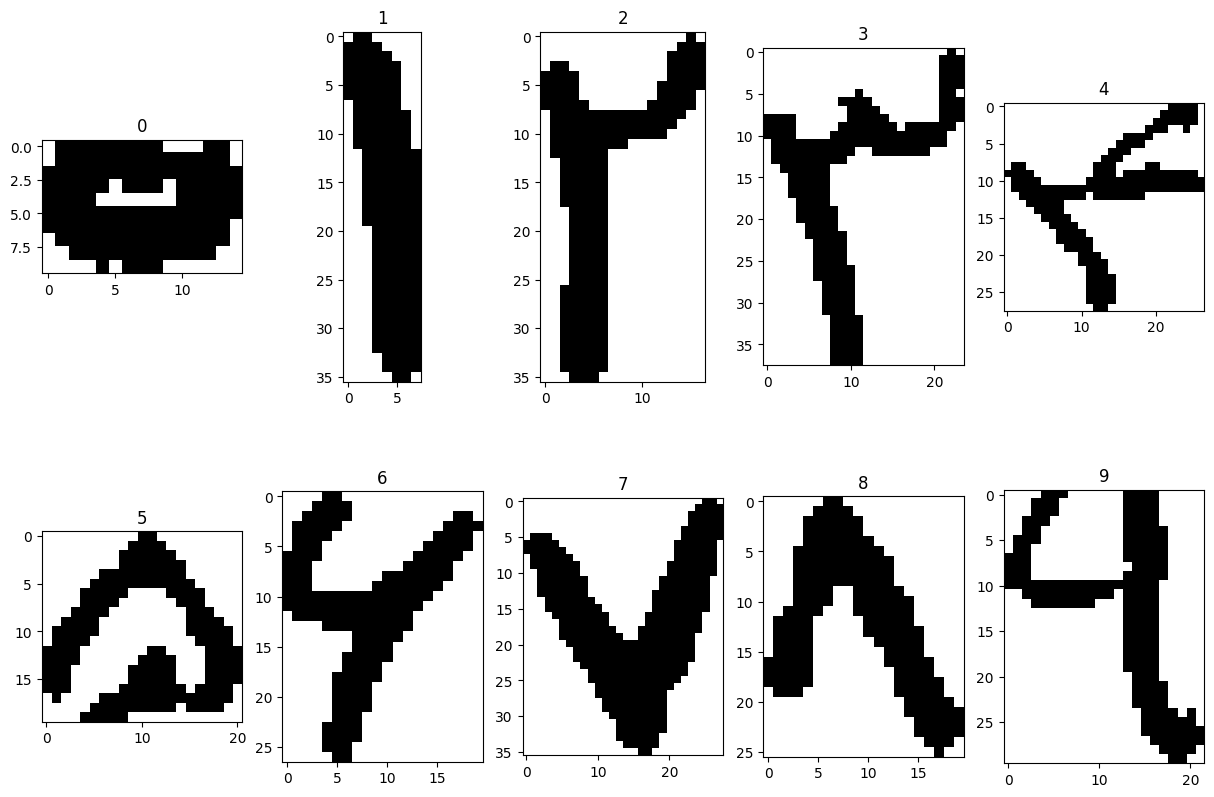

In [9]:
fig, axs = plt.subplots(2, 5,figsize=(15,10))
for i in range(10): 
    digit = np.where(labels == i)[0][0]
    axs[i//5,i%5].imshow(primitive_data[digit],cmap='gray_r')
    axs[i//5,i%5].set_title(i)
plt.show()
    

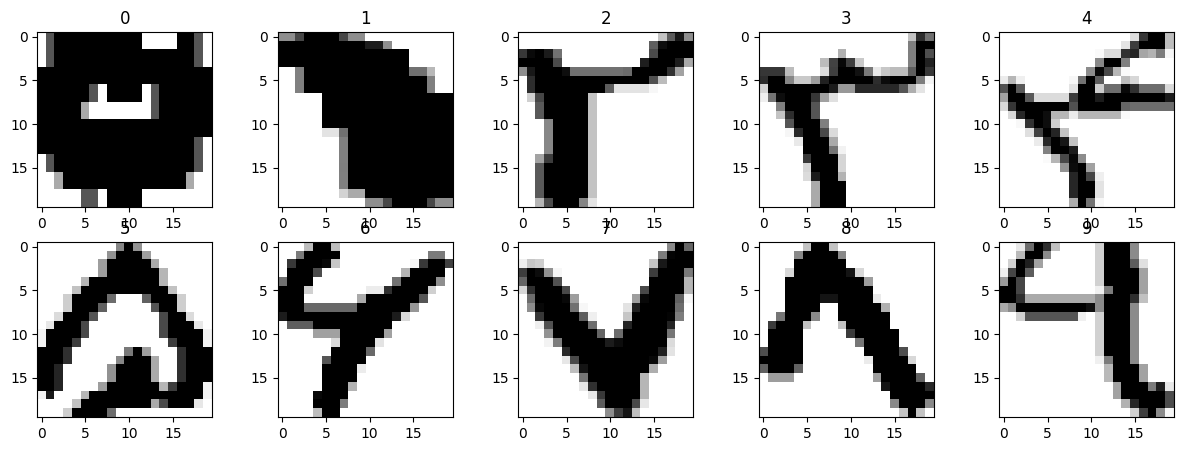

In [10]:
fig, axs = plt.subplots(2, 5,figsize=(15,5))
for i in range(10): 
    digit = np.where(labels == i)[0][0]
    normilized = cv2.resize(primitive_data[digit], dsize=(20,20), interpolation = INTERPOLATION_METHOD)
    axs[i//5,i%5].imshow(normilized,cmap='gray_r')
    axs[i//5,i%5].set_title(i)
plt.show()

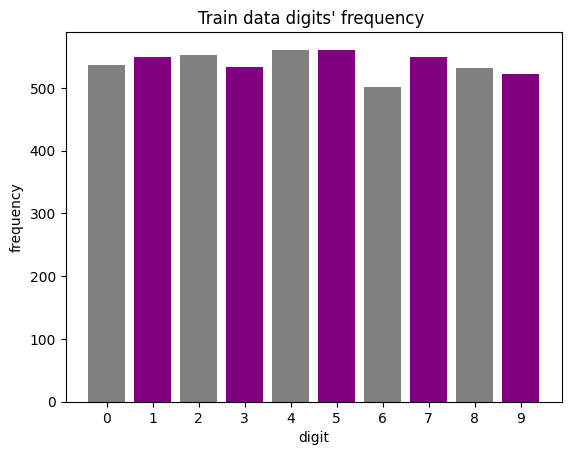

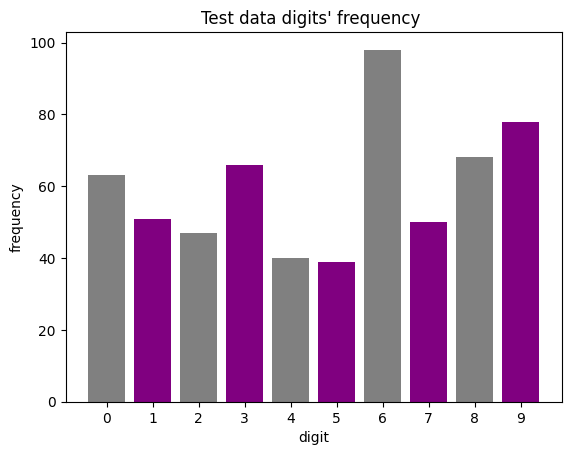

In [11]:
count_train = [0] * 10
count_test = [0] * 10
for i in range(10):
    count_train[i] = np.count_nonzero(labels[:TRAIN_SIZE] == i)
    count_test[i] = np.count_nonzero(labels[TRAIN_SIZE:] == i)

plt.bar(x = range(10), height = count_train, width=0.8, color = ['gray','purple'], tick_label = range(10))
plt.xlabel('digit')
plt.ylabel('frequency')
plt.title('Train data digits\' frequency ')
plt.show()

plt.bar(x = range(10), height = count_test, width=0.8, color = ['gray','purple'], tick_label = range(10))
plt.xlabel('digit')
plt.ylabel('frequency')
plt.title('Test data digits\' frequency ')
plt.show()

Q7: 

Posterior: p(c|x) is posterior, which is our answer, we need to calculate it by other values

prior: p(c) is proir, which is class probibilities before we have any information about pixel, we can calculate it by p(ci) = n(ci) / totall size of classes.

likelihood: p(x|c) is liklihood, we calculate it by analyzing train data, in this project we calculate them with two method, first we consider values of pixels is a normal distribution, so we calculate mean and standard deviation for any pixel and then we calculate every pixel pdf and multiple all of them as we know children(which are pixels) are independenc by having their parents(here are classes) as condition. in the second method we use bernouli distribution which is same as first method but every pixel probibility is calculated by bernouli formula.

evidence: p(x) is evidence which can be calculated by sum of $$p(ci)\times p(x|ci)$$ for every i (for every classes)

Q8: 

1. for normal naive bayes we may have standard deviation = 0 for a pixel, this happens when a value of a pixel is same in any train data.
2. for bernouli naive bayes we may have a p(xi|c) = 0, so multiply it on other pixels' probibility will give us p = 0 as result which can be false, this happens when a value of a pixel is same in any train data(0 or 1) na in test data we have different answer(1 or 0).

Q9:
1. for normal naive bayes we can add a small amount to all standard deviation to prevent divide by zero
2. in bernouli naive bayes we can use a alpha to add and use an alternative way to calculate probibility:
p = A + alpha / N + k * alpha
A = number of data which meets condition
N  total number of data
k = number of different features(here is 2)



$$ P(x|c) = \frac{α + number\ of\ x\ appearances\ in\ class\ c}{total\ values\ in\ class\ c + α \times different\ values\ in\ class\ c} $$

Q10,11,12:

$$Accuracy = \frac{total\ correctly\ detected}{total\ pictures}$$
$$Precision = \frac{correctly\ detected\ in\ class}{detected\ ones\ in\ class}$$
$$Recall = \frac{correctly\ detected\ in\ class}{total\ pictures\ in\ class}$$
$$ F1 = 2\times \frac{Precision \times Recall}{Precision + Recall}$$


Precision shows how much of detected are true, it is not enaough because imagine we have 100 pictures in a class, and we detect only 10 of them but all true, we have a 100% Precision but actually we have a pure detection.

Recall shows how much of detected are actually in class, it is not enaough because imagine we have 100 pictures in a class and 1000 pictures totally, if we detect all of pictures in that class we have 100% recall but actually we have a pure detection.
The F1 score is the harmonic mean of precision and recall.  

harmonic mean averages two precision and recall into a single rate, but it gives a larger weight to the lower one.

Micro average is average of all pictures not considering their class $ \frac{\sum_{i} numerator}{\sum_{i}denominator}$ , so we have accuracy = micro average F1 = micro average recall = micro average recall

Macro average is average off classes values $\sum_{i} class values_i$

weighted average is sum off classes values according to their weight $\sum_{i} \times \frac{Nclass_i}{totall} \times class values_i $

In [12]:
prob_class = [0] * 10
mean_class = np.zeros((10,400))
std_class = np.zeros((10,400))

gaussian_preprocess(smoothing=0.01)#smoothing = 0.01

errors = []
correct_detected = [0] * 10
all_detected = [0] * 10
all_class = [0] * 10

for i in range(TRAIN_SIZE, DATA_SIZE - 1):
    correct = labels[i]
    detected = gaussian_naive(data[i]) 
    all_class[correct] += 1
    all_detected[detected] += 1
    if (detected == correct):
        correct_detected[detected] += 1
    else:
        errors.append(i)

precision = [0] * 10
recall = [0] * 10
F1 = [0] * 10


for i in range(10):
    precision[i] = correct_detected[i]/all_detected[i] * 100
    recall[i] = correct_detected[i]/all_class[i] * 100
    F1[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i])


In [13]:
cols = [*range(10),'All Classes']
rows = ['Precision', 'Recall', 'F1', 'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1',
 'Weighted Avg Precision', 'Weighted Avg Recall', 'Weighted Avg F1','Micro Avg = Accuracy']
result = pd.DataFrame(index=rows, columns=cols)
for i in range(10):
    result.loc['Precision', i] = precision[i]
    result.loc['Recall', i] = recall[i]
    result.loc['F1', i] = F1[i]

result.loc['Macro Avg Precision', 'All Classes'] = np.mean(precision)
result.loc['Macro Avg Recall', 'All Classes'] = np.mean(recall)
result.loc['Macro Avg F1', 'All Classes'] = np.mean(F1)
result.loc['Weighted Avg Precision', 'All Classes'] = np.average(precision,weights=all_class)
result.loc['Weighted Avg Recall', 'All Classes'] = np.average(recall,weights=all_class)
result.loc['Weighted Avg F1', 'All Classes'] = np.average(F1,weights=all_class)
result.loc['Micro Avg = Accuracy', 'All Classes'] = sum(correct_detected)/sum(all_class)*100

result.fillna('-',inplace=True)



## GAUSSIAN NAIVE BAYES WITH SMOOTHING

we must use smoothing on normal distribution because we if std = 0, we can not devide by zero

In [14]:
display(result)

,0,1,2,3,4,5,6,7,8,9,All Classes
Precision,95.454545,87.5,63.829787,84.285714,93.939394,92.5,97.101449,90.384615,100.0,71.296296,-
Recall,100.0,82.352941,63.829787,89.393939,77.5,94.871795,69.072165,94.0,97.058824,98.717949,-
F1,97.674419,84.848485,63.829787,86.764706,84.931507,93.670886,80.722892,92.156863,98.507463,82.795699,-
Macro Avg Precision,-,-,-,-,-,-,-,-,-,-,87.62918
Macro Avg Recall,-,-,-,-,-,-,-,-,-,-,86.67974
Macro Avg F1,-,-,-,-,-,-,-,-,-,-,86.590271
Weighted Avg Precision,-,-,-,-,-,-,-,-,-,-,87.985395
Weighted Avg Recall,-,-,-,-,-,-,-,-,-,-,86.644407
Weighted Avg F1,-,-,-,-,-,-,-,-,-,-,86.564595
Micro Avg = Accuracy,-,-,-,-,-,-,-,-,-,-,86.644407


recognized = 1
real = 6


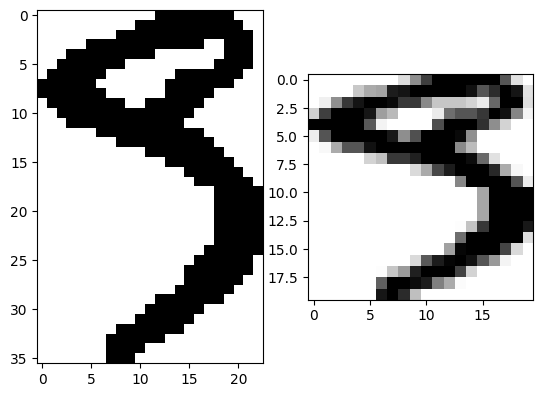

recognized = 4
real = 8


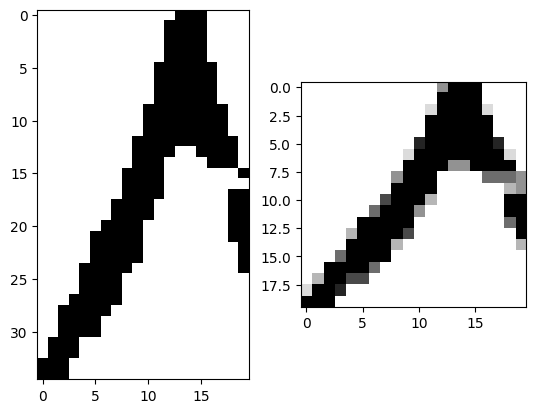

recognized = 9
real = 6


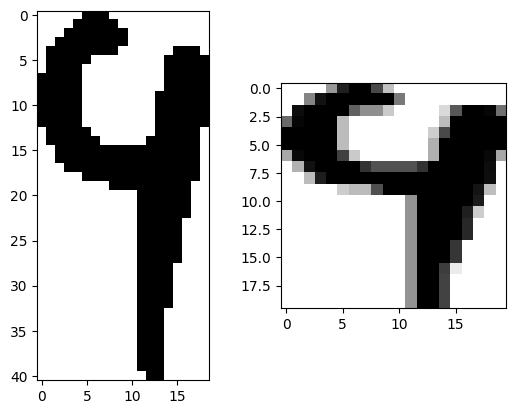

recognized = 9
real = 6


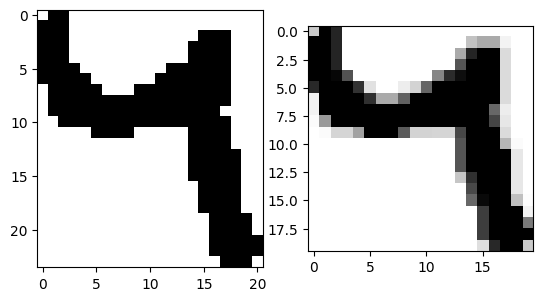

recognized = 9
real = 1


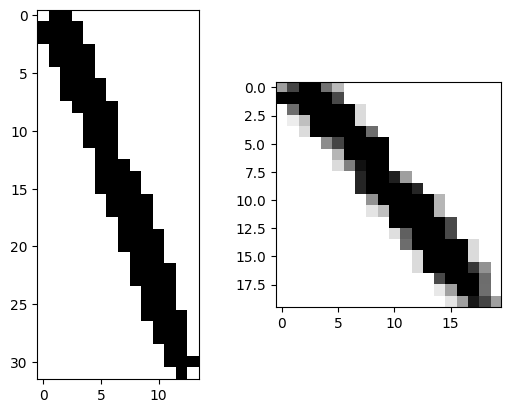

In [15]:
indx = random.sample(range(len(errors)), 5)
for i in indx:
    fig, axs = plt.subplots(1,2)
    print('recognized =', gaussian_naive(data[errors[i]]))
    print('real =', labels[errors[i]])
    axs[0].imshow(primitive_data[errors[i]],cmap='gray_r')
    normalized = cv2.resize(primitive_data[errors[i]], dsize=(20,20), interpolation = INTERPOLATION_METHOD)
    axs[1].imshow(normalized,cmap='gray_r')
    plt.show()

In [16]:
prob_class = [0] * 10
bernouli_pxc = np.zeros((10,400))

bernouli_preprocess(threshold = 0.3, alpha = 0)

errors = []
correct_detected = [0] * 10
all_detected = [0] * 10
all_class = [0] * 10

for i in range(TRAIN_SIZE, DATA_SIZE - 1):
    correct = labels[i]
    detected = bernouli_naive(data[i]) 
    all_class[correct] += 1
    all_detected[detected] += 1
    if (detected == correct):
        correct_detected[detected] += 1
    else:
        errors.append(i)

precision = [0] * 10
recall = [0] * 10
F1 = [0] * 10
for i in range(10):
    precision[i] = correct_detected[i]/all_detected[i] * 100
    recall[i] = correct_detected[i]/all_class[i] * 100
    F1[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i])


In [17]:
cols = [*range(10),'All Classes']
rows = ['Precision', 'Recall', 'F1', 'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1',
 'Weighted Avg Precision', 'Weighted Avg Recall', 'Weighted Avg F1','Micro Avg = Accuracy']
result = pd.DataFrame(index=rows, columns=cols)
for i in range(10):
    result.loc['Precision', i] = precision[i]
    result.loc['Recall', i] = recall[i]
    result.loc['F1', i] = F1[i]

result.loc['Macro Avg Precision', 'All Classes'] = np.mean(precision)
result.loc['Macro Avg Recall', 'All Classes'] = np.mean(recall)
result.loc['Macro Avg F1', 'All Classes'] = np.mean(F1)
result.loc['Weighted Avg Precision', 'All Classes'] = np.average(precision,weights=all_class)
result.loc['Weighted Avg Recall', 'All Classes'] = np.average(recall,weights=all_class)
result.loc['Weighted Avg F1', 'All Classes'] = np.average(F1,weights=all_class)
result.loc['Micro Avg = Accuracy', 'All Classes'] = sum(correct_detected)/sum(all_class)*100

result.fillna('-',inplace=True)

## BERNOULI NAIVE BAYES WITHOUT SMOOTHING

In [18]:
display(result)

,0,1,2,3,4,5,6,7,8,9,All Classes
Precision,93.939394,89.795918,59.615385,83.606557,92.105263,95.0,97.260274,90.384615,100.0,75.490196,-
Recall,98.412698,86.27451,65.957447,77.272727,87.5,97.435897,73.195876,94.0,97.058824,98.717949,-
F1,96.124031,88.0,62.626263,80.314961,89.74359,96.202532,83.529412,92.156863,98.507463,85.555556,-
Macro Avg Precision,-,-,-,-,-,-,-,-,-,-,87.71976
Macro Avg Recall,-,-,-,-,-,-,-,-,-,-,87.582593
Macro Avg F1,-,-,-,-,-,-,-,-,-,-,87.276067
Weighted Avg Precision,-,-,-,-,-,-,-,-,-,-,88.228135
Weighted Avg Recall,-,-,-,-,-,-,-,-,-,-,87.145242
Weighted Avg F1,-,-,-,-,-,-,-,-,-,-,87.164799
Micro Avg = Accuracy,-,-,-,-,-,-,-,-,-,-,87.145242


In [19]:
prob_class = [0] * 10
bernouli_pxc = np.zeros((10,400))

bernouli_preprocess(threshold = 0.3, alpha = 1)

errors = []
correct_detected = [0] * 10
all_detected = [0] * 10
all_class = [0] * 10

for i in range(TRAIN_SIZE, DATA_SIZE - 1):
    correct = labels[i]
    detected = bernouli_naive(data[i]) 
    all_class[correct] += 1
    all_detected[detected] += 1
    if (detected == correct):
        correct_detected[detected] += 1
    else:
        errors.append(i)

precision = [0] * 10
recall = [0] * 10
F1 = [0] * 10
for i in range(10):
    precision[i] = correct_detected[i]/all_detected[i] * 100
    recall[i] = correct_detected[i]/all_class[i] * 100
    F1[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i])


In [20]:
cols = [*range(10),'All Classes']
rows = ['Precision', 'Recall', 'F1', 'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1',
 'Weighted Avg Precision', 'Weighted Avg Recall', 'Weighted Avg F1','Micro Avg = Accuracy']
result = pd.DataFrame(index=rows, columns=cols)
for i in range(10):
    result.loc['Precision', i] = precision[i]
    result.loc['Recall', i] = recall[i]
    result.loc['F1', i] = F1[i]

result.loc['Macro Avg Precision', 'All Classes'] = np.mean(precision)
result.loc['Macro Avg Recall', 'All Classes'] = np.mean(recall)
result.loc['Macro Avg F1', 'All Classes'] = np.mean(F1)
result.loc['Weighted Avg Precision', 'All Classes'] = np.average(precision,weights=all_class)
result.loc['Weighted Avg Recall', 'All Classes'] = np.average(recall,weights=all_class)
result.loc['Weighted Avg F1', 'All Classes'] = np.average(F1,weights=all_class)
result.loc['Micro Avg = Accuracy', 'All Classes'] = sum(correct_detected)/sum(all_class)*100

result.fillna('-',inplace=True)

## BERNOULI NAIVE BAYES WITH SMOOTHING

In [21]:
display(result)

,0,1,2,3,4,5,6,7,8,9,All Classes
Precision,93.939394,89.795918,59.615385,83.606557,92.105263,95.0,97.222222,90.384615,100.0,74.757282,-
Recall,98.412698,86.27451,65.957447,77.272727,87.5,97.435897,72.164948,94.0,97.058824,98.717949,-
F1,96.124031,88.0,62.626263,80.314961,89.74359,96.202532,82.840237,92.156863,98.507463,85.082873,-
Macro Avg Precision,-,-,-,-,-,-,-,-,-,-,87.642664
Macro Avg Recall,-,-,-,-,-,-,-,-,-,-,87.4795
Macro Avg F1,-,-,-,-,-,-,-,-,-,-,87.159881
Weighted Avg Precision,-,-,-,-,-,-,-,-,-,-,88.126535
Weighted Avg Recall,-,-,-,-,-,-,-,-,-,-,86.978297
Weighted Avg F1,-,-,-,-,-,-,-,-,-,-,86.991646
Micro Avg = Accuracy,-,-,-,-,-,-,-,-,-,-,86.978297


recognized = 9
real = 6


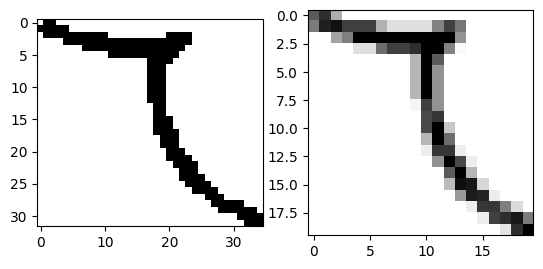

recognized = 2
real = 3


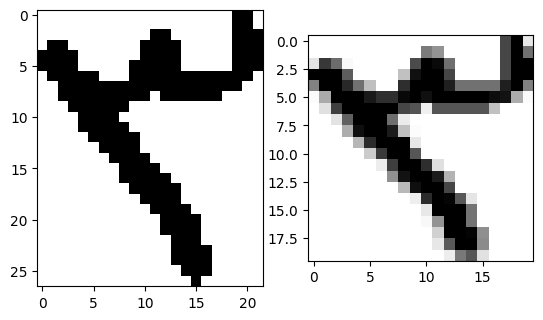

recognized = 9
real = 6


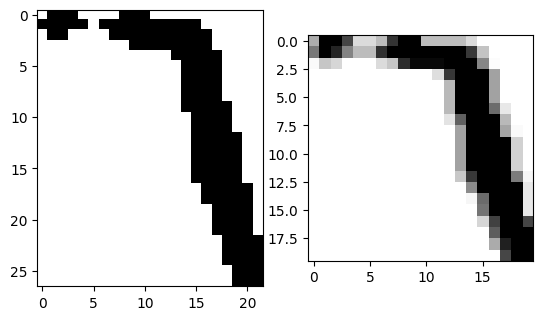

recognized = 3
real = 6


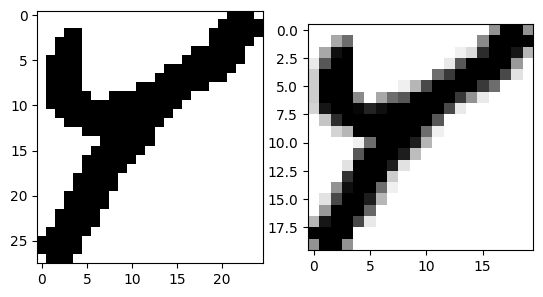

recognized = 9
real = 6


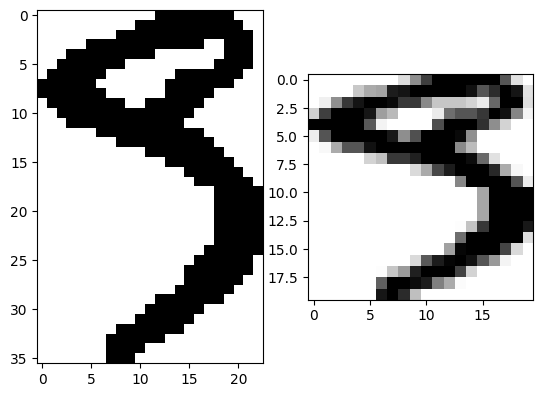

In [22]:
indx = random.sample(range(len(errors)), 5)
for i in indx:
    fig, axs = plt.subplots(1,2)
    print('recognized =', bernouli_naive(data[errors[i]]))
    print('real =', labels[errors[i]])
    axs[0].imshow(primitive_data[errors[i]],cmap='gray_r')
    normalized = cv2.resize(primitive_data[errors[i]], dsize=(20,20), interpolation = INTERPOLATION_METHOD)
    axs[1].imshow(normalized,cmap='gray_r')
    plt.show()

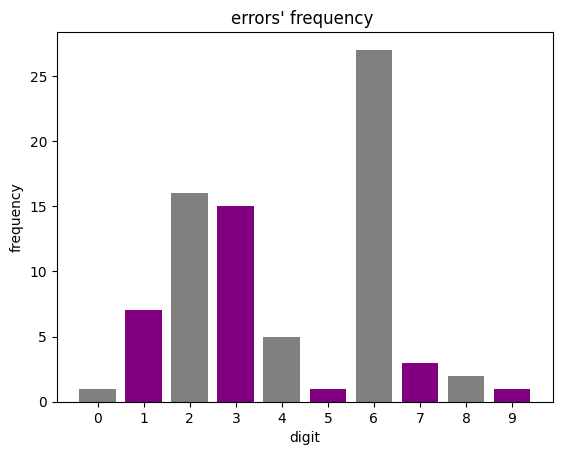

In [23]:
count_errors = [0] * 10
for i in range(10):
    count_errors[i] = np.count_nonzero(labels[errors] == i)
plt.bar(x = range(10), height = count_errors, width=0.8, color = ['gray','purple'], tick_label = range(10))
plt.xlabel('digit')
plt.ylabel('frequency')
plt.title('errors\' frequency ')
plt.show()


## Analyze

According to the results above we can see:
- 6 has a good precision but a bad recall so we underdetect 6 (does not detect all 6 but those detected are true)
- 9 has a good recall but a bad precision so we overdetect 9(detect more 9 than real but detects most 9 truly)
- mostly 2 and 3 missdetected with each other (as we expect)
- according to the fact that 6 is written in two ways in persian, we detect it poorly, a good way to handle this, we can have two labels for 6 and count them seperately
